# Statistic Tests

http://www.scipy-lectures.org/packages/statistics/index.html

The site explains some statistical tests with Python.

In [1]:
# Import
import pandas

# Load the Data
data = pandas.read_csv('brain_size.csv', sep=',', na_values=".")
print(data.shape)
data.head()

(40, 7)


,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,Female,133,132,124,118.0,64.5,816932
1,Male,140,150,124,NaN,72.5,1001121
2,Male,139,123,150,143.0,73.3,1038437
3,Male,133,129,128,172.0,68.8,965353
4,Female,137,132,134,147.0,65.0,951545


## Group By Gender

In [2]:
groupby_gender = data.groupby('Gender')
groupby_gender.mean()

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Gender,,,,,,
Female,111.9,109.45,110.45,137.200000,65.765000,862654.6
Male,115.0,115.25,111.60,166.444444,71.431579,954855.4


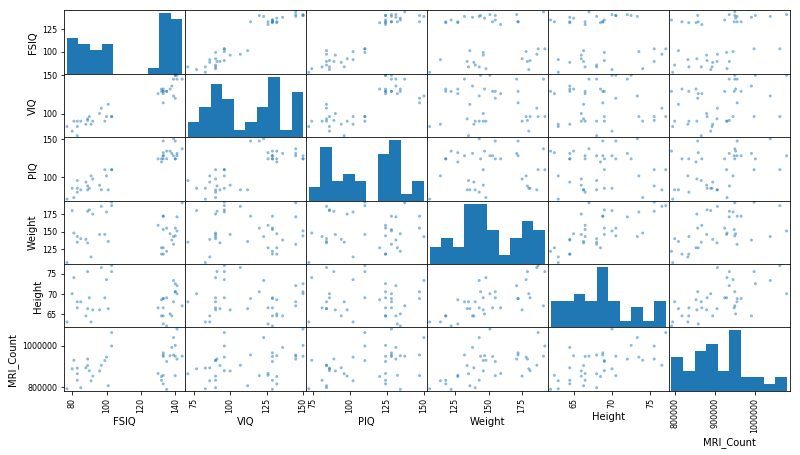

In [3]:
# Import
from pandas import plotting
import matplotlib.pyplot as plt

# Plot Scattermatrix
plotting.scatter_matrix(data, figsize=(13,7))
plt.show()

## Statistical Tests

In [4]:
# Import
from scipy import stats

### Test a population for a specific mean value

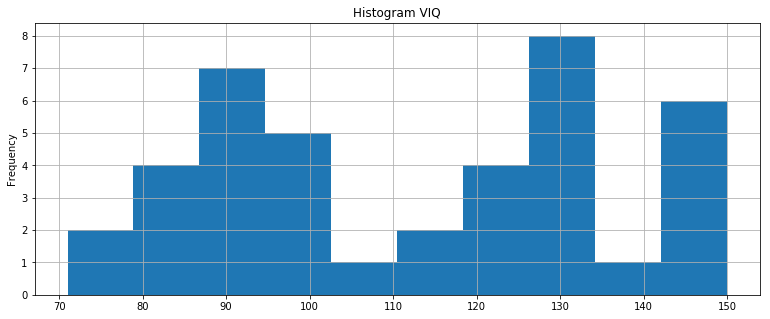

Ttest_1sampResult(statistic=3.3074146385401786, pvalue=0.0020301174047818219)

In [5]:
test_mean_value = 100

data['VIQ'].plot(kind='hist', figsize=(13,5), title='Histogram VIQ', grid=True, bins=10)
plt.show()

stats.ttest_1samp(data['VIQ'], test_mean_value)

### Test for two populations

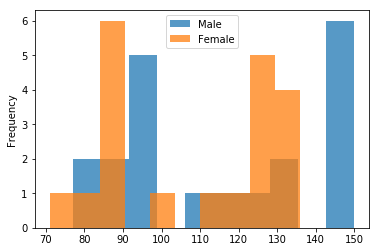

Ttest_indResult(statistic=-0.77261617232750113, pvalue=0.44452876778583217)

In [6]:
column = 'VIQ'

data[data['Gender']=='Male'][column].plot(kind='hist', alpha=0.75, label='Male')
data[data['Gender']=='Female'][column].plot(kind='hist', alpha=0.75, label='Female')
plt.legend()
plt.show()

female_viq = data[data['Gender'] == 'Female'][column]
male_viq = data[data['Gender'] == 'Male'][column]
stats.ttest_ind(female_viq, male_viq)

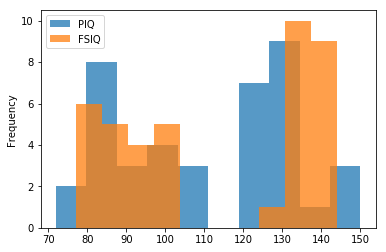

Ttest_indResult(statistic=-0.46563759638096403, pvalue=0.64277250094148408)
Ttest_relResult(statistic=-1.7842019405859857, pvalue=0.082172638183642358)
Ttest_1sampResult(statistic=-1.7842019405859857, pvalue=0.082172638183642358)
WilcoxonResult(statistic=274.5, pvalue=0.10659492713506856)


In [7]:
column_1 = 'PIQ'
column_2 = 'FSIQ'

data[column_1].plot(kind='hist', alpha=0.75, label=column_1)
data[column_2].plot(kind='hist', alpha=0.75, label=column_2)
plt.legend()
plt.show()

female_viq = data[column_1]
male_viq = data[column_2]
print(stats.ttest_ind(female_viq, male_viq))

print(stats.ttest_rel(data[column_1], data[column_2]))

print(stats.ttest_1samp(data[column_1] - data[column_2], 0))

print(stats.wilcoxon(data[column_1], data[column_2]))

# Tests with real data

Load the dataset

In [8]:
import matplotlib.pyplot as plt
import seaborn.apionly as sns
from scipy import stats

iris = sns.load_dataset('iris')
print(iris.shape)
iris.head()

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Plot and compare the mean and distribution

In [9]:
setosa = iris[iris['species']=='setosa']['sepal_length']
versicolor = iris[iris['species']=='versicolor']['sepal_length']
virginica  =iris[iris['species']=='virginica']['sepal_length']

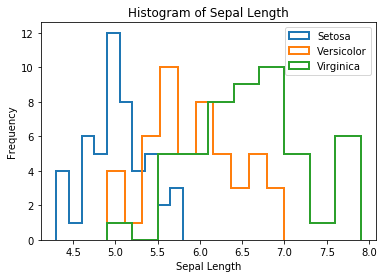

In [10]:
plt.hist(setosa, histtype=u'step', linewidth=2.0, label='Setosa')
plt.hist(versicolor, histtype=u'step', linewidth=2.0, label='Versicolor')
plt.hist(virginica, histtype=u'step', linewidth=2.0, label='Virginica')
plt.title('Histogram of Sepal Length')
plt.xlabel('Sepal Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [11]:
print(stats.ttest_ind(setosa, versicolor, equal_var=False))
print(stats.ttest_ind(setosa, virginica, equal_var=False))
print(stats.ttest_ind(versicolor, virginica, equal_var=False))

Ttest_indResult(statistic=-10.520986267549111, pvalue=3.7467426139838419e-17)
Ttest_indResult(statistic=-15.386195820079404, pvalue=3.9668672709859296e-25)
Ttest_indResult(statistic=-5.6291652597198008, pvalue=1.8661443873771216e-07)


All three plants have a significantly distinct mean-value for their sepal length

# Are the values from the same distribution?

In [12]:
print(stats.ks_2samp(setosa, versicolor))
print(stats.ks_2samp(setosa, virginica))
print(stats.ks_2samp(virginica, versicolor))

Ks_2sampResult(statistic=0.78000000000000003, pvalue=2.1317578632654785e-14)
Ks_2sampResult(statistic=0.91999999999999993, pvalue=7.2931782229598809e-20)
Ks_2sampResult(statistic=0.46000000000000008, pvalue=2.7637687591291267e-05)


All three plants have a significantly distinct distribution for their sepal length